In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [7]:
C = 299792458.
fre = 5.15e9
initialrx = -96
initialtx = 16.0206

In [8]:
def calculate(pt,frequence,distance):
    m_lamda = C/fre
    numerator = m_lamda*m_lamda
    denominator = 16*np.pi*np.pi*distance*distance*1.0
    lossDb = -10*math.log(numerator/denominator)/math.log(10)
    return pt-max(0,lossDb)

In [9]:
calculate(16,fre,200)

-76.70452771598681

In [10]:
x = np.linspace(0.1,1000,1000)

In [11]:
y = []
for item in x:
    y.append(calculate(7.5,fre,item))

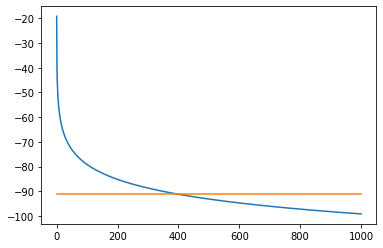

In [12]:
x2 = np.linspace(0.1,1000,1000)
y2 = x2/x2*-91
plt.plot(x,y)
plt.plot(x2,y2)
plt.show()